In [ ]:
import math
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib
import matplotlib.pyplot as plt
import sklearn.decomposition
from collections import defaultdict
from scipy.stats import pearsonr
import seaborn as sn

In [ ]:
mut = pd.read_csv("mutationsComplete.csv")
patients = pd.read_excel("d1.xlsx")

In [ ]:
patients.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 296 entries, 0 to 295
Data columns (total 69 columns):
 #   Column                                        Non-Null Count  Dtype         
---  ------                                        --------------  -----         
 0   PatientCode                                   296 non-null    int64         
 1   PatientFirstName                              296 non-null    object        
 2   PatientDOB                                    296 non-null    object        
 3   AccessionNumber                               296 non-null    object        
 4   ClientSpecimenId                              296 non-null    object        
 5   patient ID                                    296 non-null    int64         
 6   arm                                           296 non-null    int64         
 7   regimen                                       296 non-null    int64         
 8   safety                                        296 non-null    int64   

In [ ]:
pdata= [94, 202]

In [ ]:
import pandas as pd

# Assuming you have a DataFrame called 'df' and you want to calculate the correlation for a column named 'column_name'

# Calculate the correlation matrix
correlation_matrix = patients.corr()

# Extract the correlation values for the specified column
column_correlation = correlation_matrix.loc['os event']

# Print the correlation matrix for the specified column
print(column_correlation)
import pandas as pd

# Assuming you have a Series object called 'column_correlation' with correlation values

# Convert the Series to a DataFrame
df_correlation = pd.DataFrame(column_correlation, columns=['Correlation'])

# Print the DataFrame
print(df_correlation)


PatientCode                                    -0.157111
patient ID                                     -0.157111
arm                                            -0.108558
regimen                                        -0.040719
safety                                          0.032322
age @random                                     0.008557
gender                                         -0.109059
perfo                                           0.102760
tumloc                                          0.031362
mucin hist                                     -0.044903
surg                                           -0.132256
tstag                                           0.182099
nstag                                           0.153470
time to mets                                    0.003683
liver Only                                     -0.123459
liver                                           0.011274
lung                                            0.140663
nodes                          

<ipython-input-149-2e3f3338ca90>:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = patients.corr()


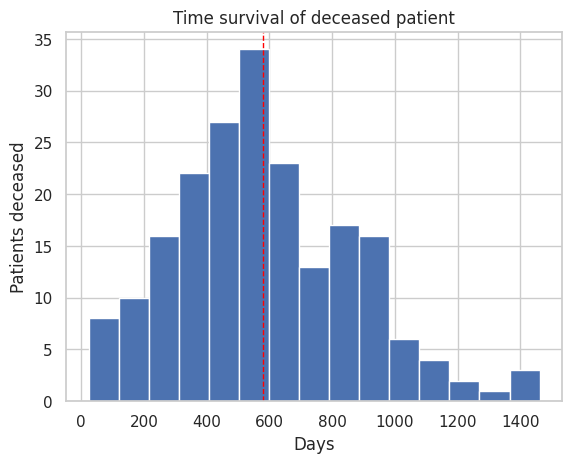

In [ ]:

fig, ax = plt.subplots(1, 1)
ax.hist(patients[patients['os event']==1]['dos'], bins=15)
  
# Set title
ax.set_title("Time survival of deceased patient")
  
# adding labels
ax.set_xlabel('Days')
ax.set_ylabel('Patients deceased')
plt.axvline(patients[patients['os event']==1]['dos'].mean(), color='red', linestyle='dashed', linewidth=1)

AttributeError: ignored

In [ ]:
column_correlation

In [ ]:
patients[(patients == -99).any(axis=1)]

,PatientCode,PatientFirstName,PatientDOB,AccessionNumber,ClientSpecimenId,patient ID,arm,regimen,safety,age @random,...,RTK_RAS,NRF2,PI3K,WNT,HIPPO,CELL_CYCLE,MYC,NOTCH,TGF_Beta,TP53
0,224,CB224,1955-07-16 00:00:00,TN19-125307,5502-1-T-2,224,1,1,1,60.630137,...,1.64,0.0,0.000000,3.750,0.000000,2.625,0.00,0.000000,0.000000,3.500000
26,275,AV275,1948-10-23 00:00:00,TN19-127339,T/80-B-60-2016,275,0,0,1,67.457534,...,1.16,0.0,4.642857,7.250,5.416667,5.000,0.00,0.000000,0.000000,6.666667
29,573,BP573,1952-05-05 00:00:00,TN19-125451,9659/16-01-02,573,1,1,1,64.731507,...,0.88,0.0,1.928571,6.000,2.250000,0.000,0.00,0.000000,0.000000,0.000000
60,652,GC652,1946-10-26 00:00:00,TN19-126192,20384/15,652,0,0,1,70.526027,...,2.20,0.0,5.928571,2.375,3.333333,6.250,0.00,10.571429,0.000000,8.333333
67,157,GS157,1950-11-25 00:00:00,TN19-118786,15-28987-06,157,0,0,1,65.024658,...,0.00,0.0,0.000000,3.875,0.000000,4.750,0.00,0.000000,8.666667,6.333333
72,30,IL030,1971-07-17 00:00:00,TN19-119319,3665/15-T1,30,0,0,1,43.934247,...,5.48,0.0,0.000000,7.250,6.000000,4.250,0.00,0.000000,12.666667,5.666667
84,577,LS577,1957-11-10 00:00:00,TN19-126169,B18679/16,577,0,0,1,59.230137,...,2.12,5.0,0.000000,16.625,4.416667,8.750,0.00,0.000000,0.000000,11.666667
105,131,MT131,1961-10-25 00:00:00,TN19-119326,8389/15-4-10M,131,1,1,1,54.021918,...,2.24,0.0,4.214286,10.750,4.916667,6.250,0.00,0.000000,0.000000,8.333333
109,386,OO386,1955-01-29 00:00:00,TN19-145040,07994/16,386,0,0,1,61.490411,...,1.72,0.0,0.000000,5.875,0.000000,13.500,0.00,10.285714,17.000000,13.333333
110,420,OR420,1955-02-04 00:00:00,TN19-119015,16I/12197-A4,420,1,1,1,61.542466,...,1.08,0.0,2.214286,7.125,2.583333,0.000,0.00,11.285714,0.000000,0.000000


In [ ]:
patients[(patients == 99).any(axis=1)]

,PatientCode,PatientFirstName,PatientDOB,AccessionNumber,ClientSpecimenId,patient ID,arm,regimen,safety,age @random,...,RTK_RAS,NRF2,PI3K,WNT,HIPPO,CELL_CYCLE,MYC,NOTCH,TGF_Beta,TP53
226,348,RM348,1950-07-21 00:00:00,TN19-118996,16-16674/08,348,1,1,1,65.890411,...,1.08,0.0,1.714286,13.0,0.0,6.625,0.0,0.0,8.666667,8.833333
289,650,SM650,1952-03-15 00:00:00,TN19-120205,3408/17-A1,650,0,0,1,65.123288,...,2.84,0.0,0.000000,0.0,0.0,0.000,0.0,0.0,6.666667,0.000000


In [ ]:
patients[(patients == '99').any(axis=1)]

,PatientCode,PatientFirstName,PatientDOB,AccessionNumber,ClientSpecimenId,patient ID,arm,regimen,safety,age @random,...,RTK_RAS,NRF2,PI3K,WNT,HIPPO,CELL_CYCLE,MYC,NOTCH,TGF_Beta,TP53


<Axes: >

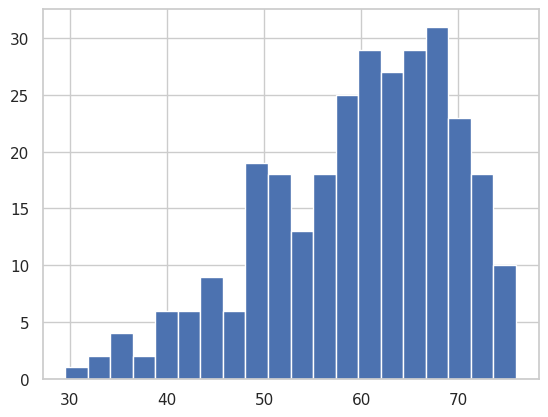

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Create the data values for the vertical y and horizontal x axis
x = np.array(["Female", "Male"])
y = np.array([94, 202])

# Set the seaborn style
sns.set(style="whitegrid")

# Set the color palette
sns.set_palette("deep")

# Create the bar plot using seaborn
plt.figure(figsize=(2, 5))
sns.barplot(x=x, y=y, width=0.4)

# Customize other plot settings (e.g., labels, title, etc.)
plt.ylabel("Number of Patients")
plt.title("Patient Status")

# Show the plot
plt.show()


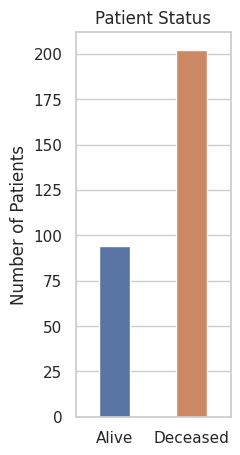

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Create the data values for the vertical y and horizontal x axis
x = np.array(["Alive", "Deceased"])
y = np.array([94, 202])

# Set the seaborn style
sns.set(style="whitegrid")

# Set the color palette
sns.set_palette("deep")

# Create the bar plot using seaborn
plt.figure(figsize=(2, 5))
sns.barplot(x=x, y=y, width=0.4)

# Customize other plot settings (e.g., labels, title, etc.)
plt.ylabel("Number of Patients")
plt.title("Patient Status")

# Show the plot
plt.show()


In [ ]:
patients[patients['os event'] == 0].count()

PatientCode         94
PatientFirstName    94
PatientDOB          94
AccessionNumber     94
ClientSpecimenId    94
                    ..
CELL_CYCLE          94
MYC                 94
NOTCH               94
TGF_Beta            94
TP53                94
Length: 69, dtype: int64

In [ ]:
mut2['o']

In [ ]:
mut2 = mut.drop(columns=['Unnamed: 0', 'dos', '1stpfs event', 'dpfs'])

In [ ]:
mut2['sumMutations'] = mut2.drop(columns=['AccessionNumber','os event']).sum(axis=1)

In [ ]:
mut2.loc[mut2['os event'] == 1, 'sumMutations'] = (-1)*mut2['sumMutations']

In [ ]:
print(mut2[mut2['os event'] == 1].count())
print(mut2[mut2['os event'] == 0].count())

AccessionNumber    202
os event           202
MLF1               202
NIN                202
GMPS               202
                  ... 
ADGRA2             202
ATR                202
ZBTB16             202
ELL                202
CHEK1              202
Length: 570, dtype: int64
AccessionNumber    94
os event           94
MLF1               94
NIN                94
GMPS               94
                   ..
ADGRA2             94
ATR                94
ZBTB16             94
ELL                94
CHEK1              94
Length: 570, dtype: int64


<Axes: >

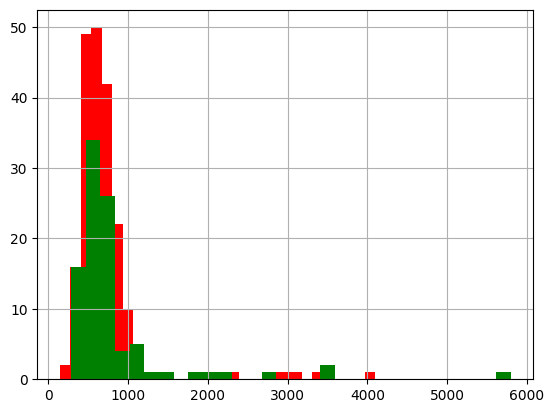

In [ ]:
mut2[mut2['os event'] == 1]['sumMutations'].hist(bins=30, color='red')
mut2[mut2['os event'] == 0]['sumMutations'].hist(bins=30, color='green')

In [ ]:
print(mut2[mut2['os event'] == 1]['AccessionNumber'].count())
print(mut2[mut2['os event'] == 0]['AccessionNumber'].count())

202
94


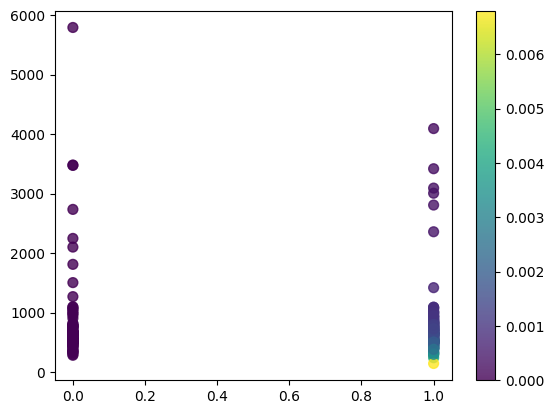

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
fig = plt.figure()
x = mut2['os event']
y = mut2['sumMutations']
colour = np.arctan2(x, y)
plt.scatter(x, y, s = 50, c = colour, alpha = 0.8)
plt.colorbar()
plt.show()

In [ ]:
mut3 = mut2.drop(columns=['AccessionNumber','os event'])

In [ ]:
import pandas as pd
import numpy as np

# Count non-zero values for each column
non_zero_counts = np.count_nonzero(mut3.values, axis=0)

# Create a DataFrame with column names and non-zero counts
result_df = pd.DataFrame({'Gene': mut3.columns, 'Patients with mutations': non_zero_counts})

# Print the result DataFrame
print(result_df)


       Gene  Patients with mutations
0      MLF1                        3
1       NIN                       16
2      GMPS                       10
3     SNX29                        5
4     MAML2                       14
..      ...                      ...
563  ADGRA2                       16
564     ATR                       17
565  ZBTB16                        5
566     ELL                        6
567   CHEK1                        1

[568 rows x 2 columns]


In [ ]:
result_df = result_df.sort_values(by='Patients with mutations', ascending=False)

In [ ]:
top_genes = result_df.iloc[:8]    # Select First 3 Rows

In [ ]:
top_genes

,Gene,Patients with mutations
337,APC,231
213,TP53,228
351,KRAS,178
161,PIK3CA,72
462,SMAD4,55
27,LRP1B,55
306,AKAP9,53
251,BRAF,50
167,RNF213,48
154,ATM,47


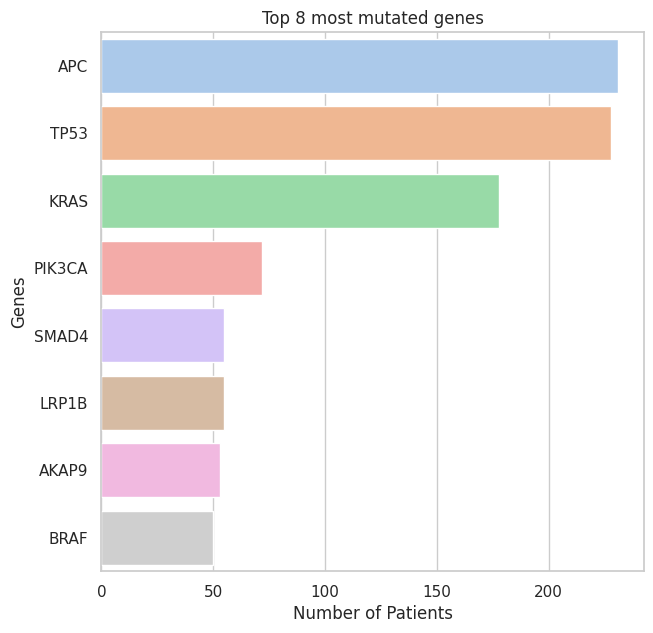

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Create the data values for the vertical y and horizontal x axis
x = np.array(top_genes['Gene'])
y = np.array(top_genes['Patients with mutations'])

# Set the seaborn style
sns.set(style="whitegrid")

# Set a color palette
colors = sns.color_palette("pastel")

# Create the bar plot using seaborn
plt.figure(figsize=(7, 7))
sns.barplot(x=y, y=x, palette=colors)

# Customize other plot settings (e.g., labels, title, etc.)
plt.xlabel("Number of Patients")
plt.ylabel("Genes")
plt.title("Top 8 most mutated genes")

# Show the plot
plt.show()
